C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 53s 45ms/step - accuracy: 0.0828 - loss: 0.2763 - val_accuracy: 0.0833 - val_loss: 0.0591
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.0855 - loss: 0.0498 - val_accuracy: 0.0801 - val_loss: 0.0314
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.0852 - loss: 0.0290 - val_accuracy: 0.0801 - val_loss: 0.0228
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.0845 - loss: 0.0217 - val_accuracy: 0.0802 - val_loss: 0.0185
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.0851 - loss: 0.0178 - val_accuracy: 0.0812 - val_loss: 0.0159
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1020 - loss: 0.0158
Test loss: 0.015893513336777687, Test accuracy: 0.08116066455841064
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step


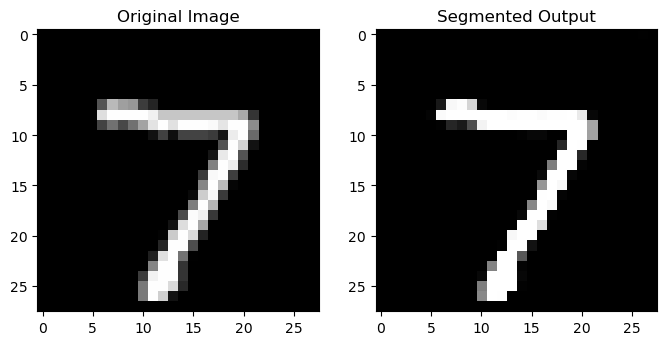

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Rescale the images to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape data to (samples, time_steps, features)
# Here each image row is treated as a time step
x_train = x_train.reshape((-1, 28, 28))  # (num_samples, timesteps, input_dim)
x_test = x_test.reshape((-1, 28, 28))

# Binary segmentation - threshold the MNIST digit vs background (1 for digit, 0 for background)
y_train_segment = np.where(x_train > 0.5, 1, 0)  # Simple thresholding
y_test_segment = np.where(x_test > 0.5, 1, 0)

# Define the LSTM-based segmentation model
model = models.Sequential([
    layers.LSTM(64, input_shape=(28, 28), return_sequences=True),  # 64 LSTM units, one for each row (sequence)
    layers.TimeDistributed(layers.Dense(28, activation='sigmoid')),  # Output for each pixel in the row (28 outputs per row)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train_segment, epochs=5, batch_size=64, validation_data=(x_test, y_test_segment))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test_segment)
print(f'Test loss: {loss}, Test accuracy: {accuracy}')

# Generate predictions
predictions = model.predict(x_test)

# Plot the first image and its segmentation result
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(x_test[0], cmap='gray')

plt.subplot(1, 2, 2)
plt.title('Segmented Output')
plt.imshow(predictions[0], cmap='gray')

plt.show()
